#Time Series Analysis and Autoregression Techniques
###February 11, 2015

In [5]:
# Magic function import allowing inline plotting
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')               # This just produces pretty plots
plt.rcParams['figure.figsize'] = (20, 10)                   # Set default figure size values for the entire notebook

In [2]:
# Pandas URL method 
# Break up URL into key portions and set up append to allow for easy updating

url = "http://www.quandl.com/api/v1/datasets/YAHOO/"
url += "INDEX_GSPC"
url += ".csv?trim_start=%s-%s-%s&trim_end=%s-%s-%s" % ('2007', '01', '01', '2015', '02', '02')

sp500 = pd.read_csv(url, parse_dates = ['Date'], dayfirst = True, index_col = 'Date')

# parse_dates: Parses the "Date" column as a datetime object instead of an object string
# index_col: Use the "Date" column as an index
# dayfirst: Switches to DD/MM format, instad of default (MM/DD format)

In [3]:
sp500.head()

Open     High      Low    Close      Volume  Adjusted Close
Date                                                                      
2015-02-02  1996.67  2021.66  1980.90  2020.85  4008330000         2020.85
2015-01-30  2019.35  2023.32  1993.38  1994.99  4538650000         1994.99
2015-01-29  2002.45  2024.64  1989.18  2021.25  4127140000         2021.25
2015-01-28  2032.34  2042.49  2001.49  2002.16  4067530000         2002.16
2015-01-27  2047.86  2047.86  2019.91  2029.55  3329810000         2029.55

In [4]:
import pandas.io.data as web

In [5]:
# This is the Pandas Remote Data Access module. It supports various Data Sources - Yahoo! Finance, Google Finance
# St.Louis FED (FRED), Kenneth French’s data library, World Bank, Google Analytics

spc = web.DataReader(name = "^GSPC", data_source = 'yahoo', start = '2007-1-1', end = '2015-2-2')
#spc.to_csv("SP500.csv")         # Function to save a data frame for offline analysis  
spc.tail()

Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2015-01-27  2047.86  2047.86  2019.91  2029.55  3329810000    2029.55
2015-01-28  2032.34  2042.49  2001.49  2002.16  4067530000    2002.16
2015-01-29  2002.45  2024.64  1989.18  2021.25  4127140000    2021.25
2015-01-30  2019.35  2023.32  1993.38  1994.99  4538650000    1994.99
2015-02-02  1996.67  2021.66  1980.90  2020.85  4008330000    2020.85

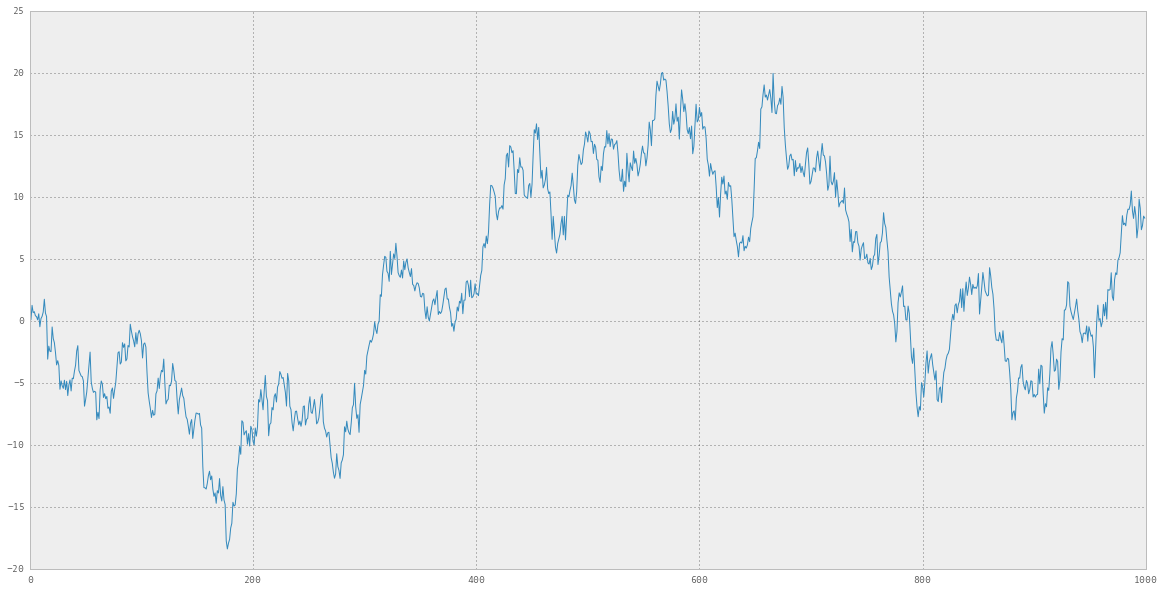

In [8]:
#Create a random walk series and plot it.
N = 1000
z = np.random.randn(N)
walk = np.zeros(N)

for i in np.arange(1, N, 1):
    walk[i] = walk[i - 1] + z[i] #Function where each random number in z is added to the previous value

plt.plot(walk)

In [57]:
# Looking at Tesla:
url2 = "https://www.quandl.com/api/v1/datasets/GOOG/NASDAQ_TSLA.csv"

TSLA = pd.read_csv(url2, parse_dates = [0], dayfirst = True, index_col = 'Date')

TSLA=TSLA.reindex(index=TSLA.index[::-1]) # Reindex the series for plotting purposes

HTTPError: HTTP Error 429: Too Many Requests

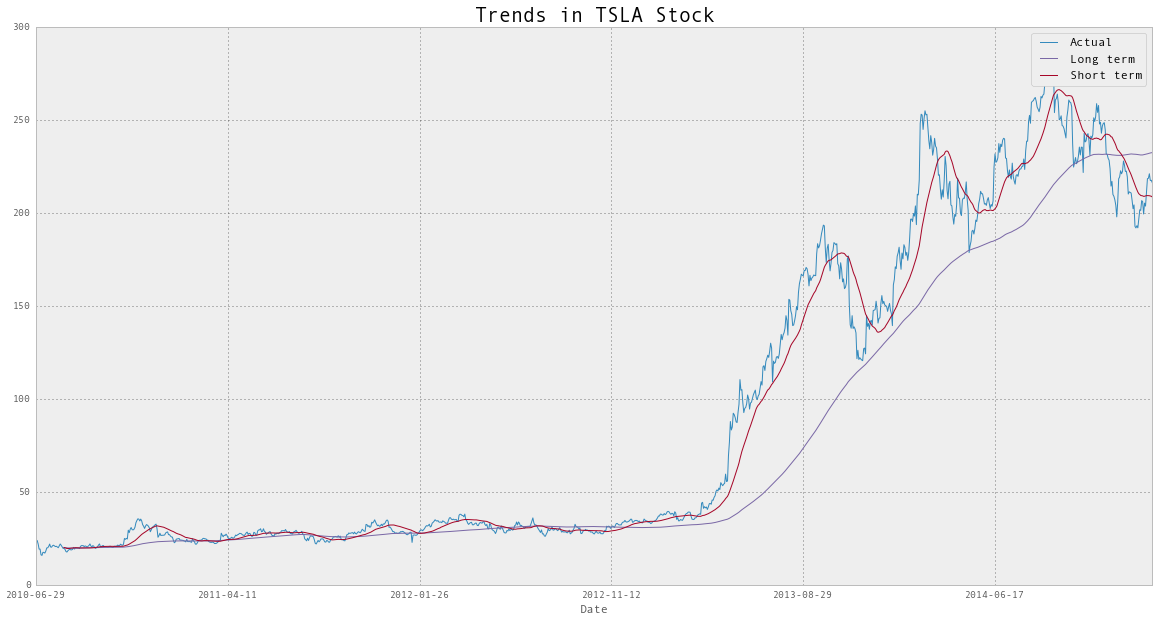

In [40]:
# Compute rolling statistics
TSLA['MA30'] = pd.rolling_mean(TSLA['Close'], window = 30, min_periods = 30) #30 day window
TSLA['MA182'] = pd.rolling_mean(TSLA['Close'], window = 182,  min_periods = 30) #6 month window
TSLA[['Close', 'MA182', 'MA30']].plot() 
plt.legend(["Actual", "Long term", "Short term"])
plt.title('Trends in TSLA Stock', fontsize = 20)

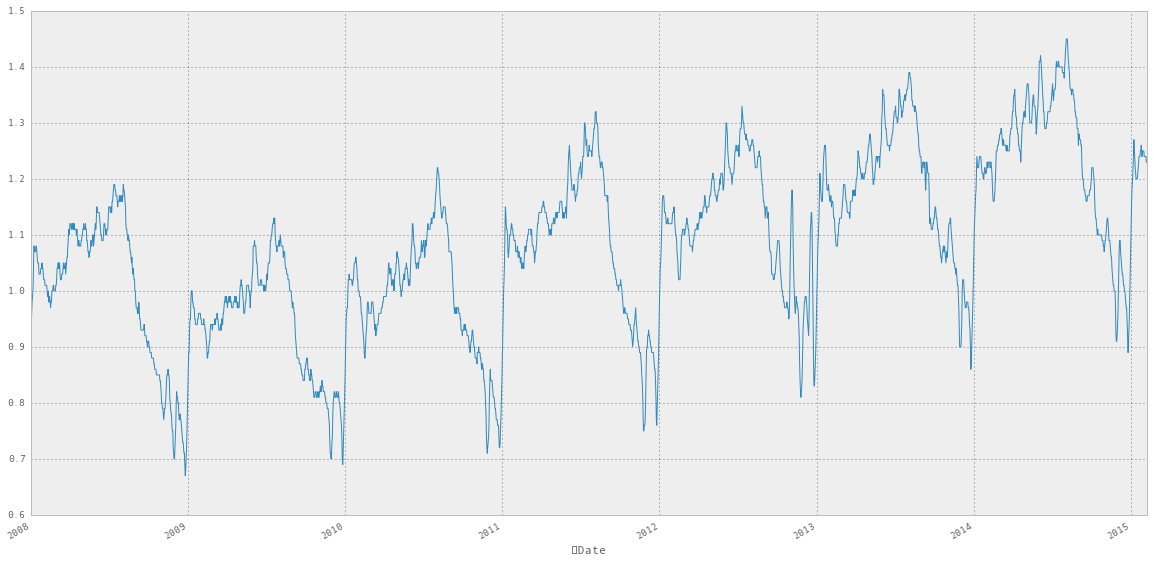

In [14]:
#Looking at the US housing market index: Q1'08 - Q1'15
url = "https://www.google.com/finance/historical?q=GOOGLEINDEX_US:RENTAL\
&output=csv&startdate=20080101&ei=_znYVJjfMZOHsgeHv4G4Cg"

r = pd.read_csv(url, parse_dates = [0], index_col = 0)
r.Close.plot()

In [25]:
import datetime as dt

# get_data_yahoo() API gets data from yahoo finance directly. 
df = web.get_data_yahoo(
     ['AAPL', 'GOOGL', 'TSLA', 'NFLX', 'MSFT', 'AMZN'], 
     start = dt.datetime(2012, 1, 1), 
     end = dt.datetime(2015, 1, 1))['Adj Close']
df.head()

AAPL    AMZN   GOOGL   MSFT   NFLX   TSLA
Date                                                  
2012-01-03  55.41  179.03  333.04  24.60  72.24  28.08
2012-01-04  55.71  177.51  334.47  25.17  80.45  27.71
2012-01-05  56.33  177.61  329.83  25.43  79.30  27.12
2012-01-06  56.92  182.61  325.34  25.83  86.29  26.91
2012-01-09  56.83  178.56  311.54  25.49  98.18  27.25

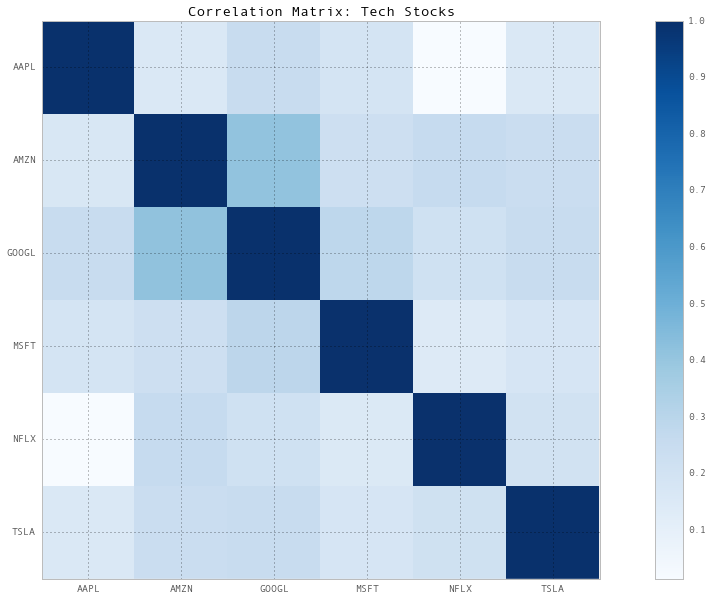

In [26]:
rets = df.pct_change()                                      # Calculates Percent change over 1-day period. 
corr = rets.corr()                                          # Computes pairwise correlation of columns
plt.imshow(corr, cmap = 'Blues', interpolation = 'none')    # Visualize the values in the entire data frame.
plt.colorbar()                                            
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
plt.title("Correlation Matrix: Tech Stocks")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ade26d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1105e5f50>]], dtype=object)

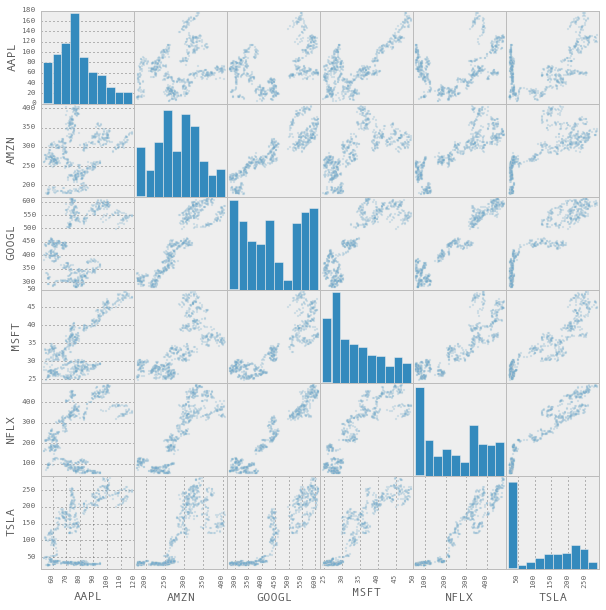

In [27]:
pd.scatter_matrix(df, figsize=[10, 10], alpha=0.2)


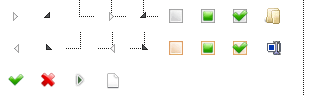
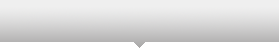
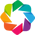
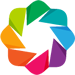
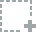
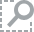
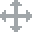
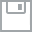
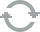
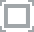
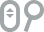

In [32]:
from math import pi          #Import Pi
from bokeh.plotting import * #Import Bokeh.Plotting

df = pd.DataFrame(sp500)[:50] 

mids = (df.Open + df.Close) / 2
spans = abs(df.Close - df.Open)

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12 * 60 * 60 * 1000        # sample 12 hours in ms
output_notebook()              # Load the Bokeh Java-Script interactive browser

figure(x_axis_type="datetime", width=1000, name="candlestick",
       tools="pan,wheel_zoom,box_zoom,reset,previewsave")

hold()

segment(df.index, df.High, df.index, df.Low, color='black')
rect(df.index[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="black")
rect(df.index[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="black")

curplot().title = "SP500 Candlestick"
xaxis().major_label_orientation = pi/4
grid().grid_line_alpha = 0.3

show()

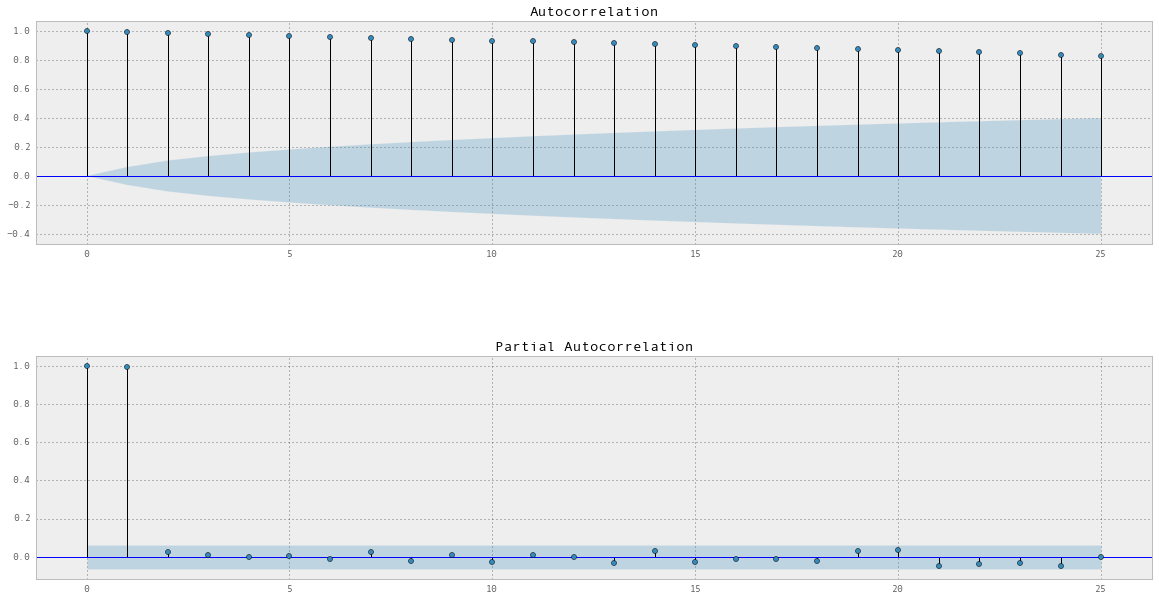

In [38]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa

# Calculate Autocorrelation, Partial Auto Correlation and the Correlogram  
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(walk, lags = 25, ax = ax1)   
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(walk, lags = 25, ax = ax2)

In [41]:
arma_mod22 = sm.tsa.ARMA(walk, (2, 2)).fit()
print(arma_mod22.summary())
print "Durbin Watson score: ", sm.stats.durbin_watson(arma_mod22.resid)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1436.561
Method:                       css-mle   S.D. of innovations              1.016
Date:                Wed, 11 Feb 2015   AIC                           2885.122
Time:                        20:24:18   BIC                           2914.569
Sample:                             0   HQIC                          2896.314
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.8019      3.858      0.726      0.468        -4.760    10.364
ar.L1.y        1.5214      1.043      1.458      0.145        -0.524     3.567
ar.L2.y       -0.5248      1.036     -0.507      0.6

(1.3708357858443443, 0.50387961784539059)


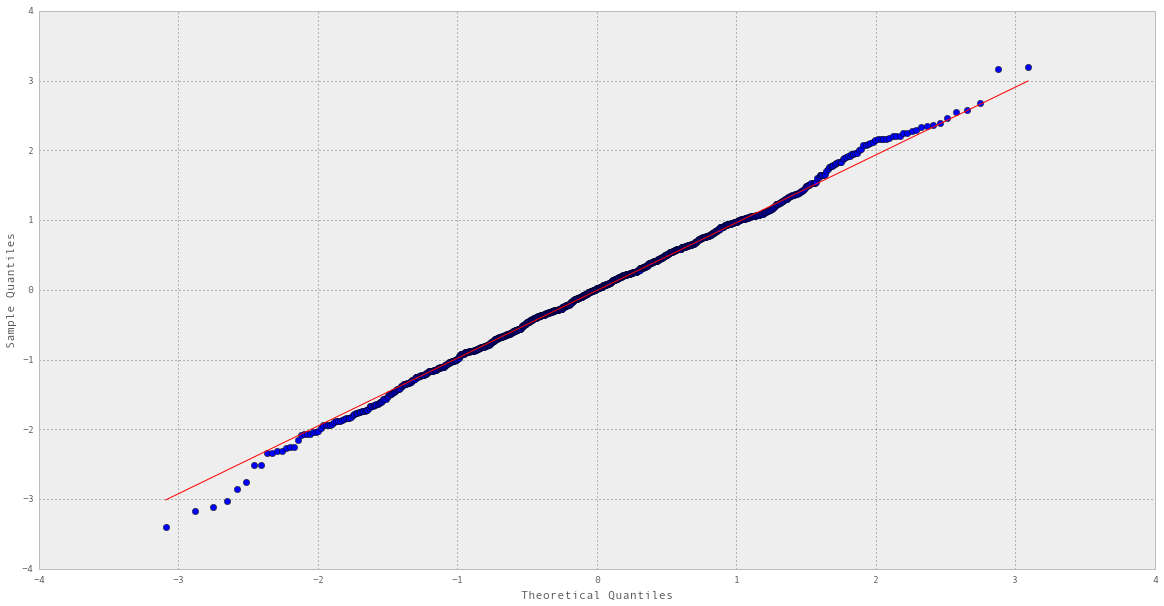

In [42]:
from statsmodels.graphics.api import qqplot
from scipy import stats

resid = arma_mod22.resid
print stats.normaltest(resid)
fig = qqplot(resid, line = 'q', fit = True)

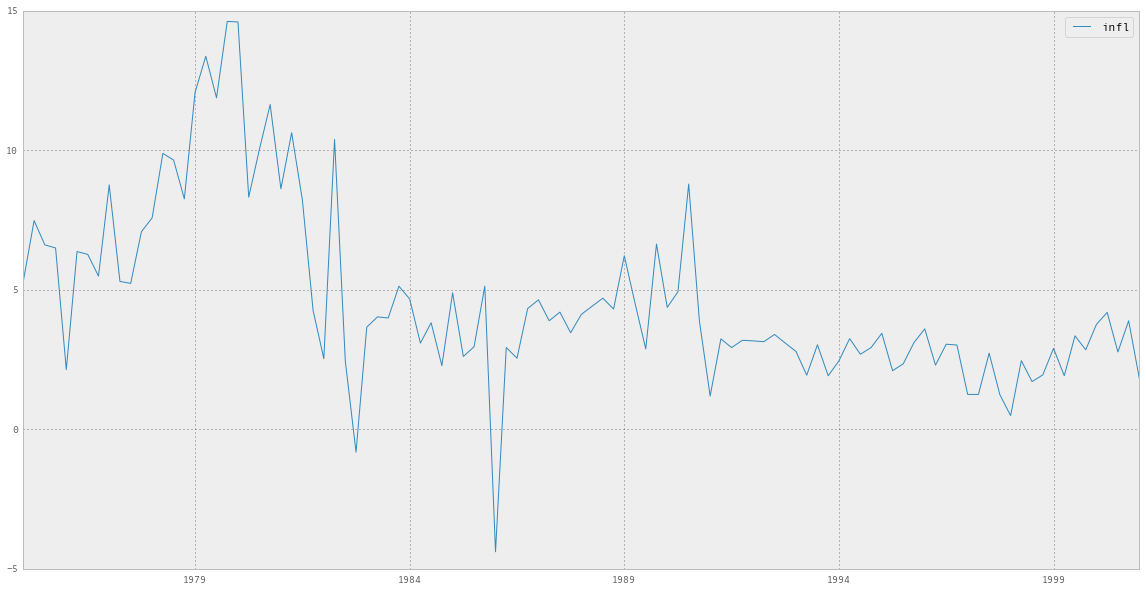

In [62]:
# CPI Data set: Explore this data set in class
# Plot and Compute the various statistics
# Explain the Correlograms

macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

cpi = macrodta["infl"]

macro_cut = macrodta['1975Q1':'2001Q1']
cpi_cut = macro_cut["infl"]

fig = plt.figure()
ax = fig.add_subplot(111)
ax = cpi_cut.plot(ax = ax)
ax.legend()

In [63]:
arma_22 = sm.tsa.ARMA(cpi_cut, (2, 2)).fit()
print(arma_22.summary())
print "Durbin Watson score: ", sm.stats.durbin_watson(arma_22.resid)

                              ARMA Model Results                              
Dep. Variable:                   infl   No. Observations:                  105
Model:                     ARMA(2, 2)   Log Likelihood                -223.304
Method:                       css-mle   S.D. of innovations              2.018
Date:                Wed, 11 Feb 2015   AIC                            458.607
Time:                        20:51:54   BIC                            474.531
Sample:                    03-31-1975   HQIC                           465.060
                         - 03-31-2001                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.5606      1.333      3.421      0.001         1.948     7.173
ar.L1.infl     0.2187      0.135      1.615      0.109        -0.047     0.484
ar.L2.infl     0.6832      0.124      5.497      0.0

(20.147100546713894, 4.2180595145300161e-05)


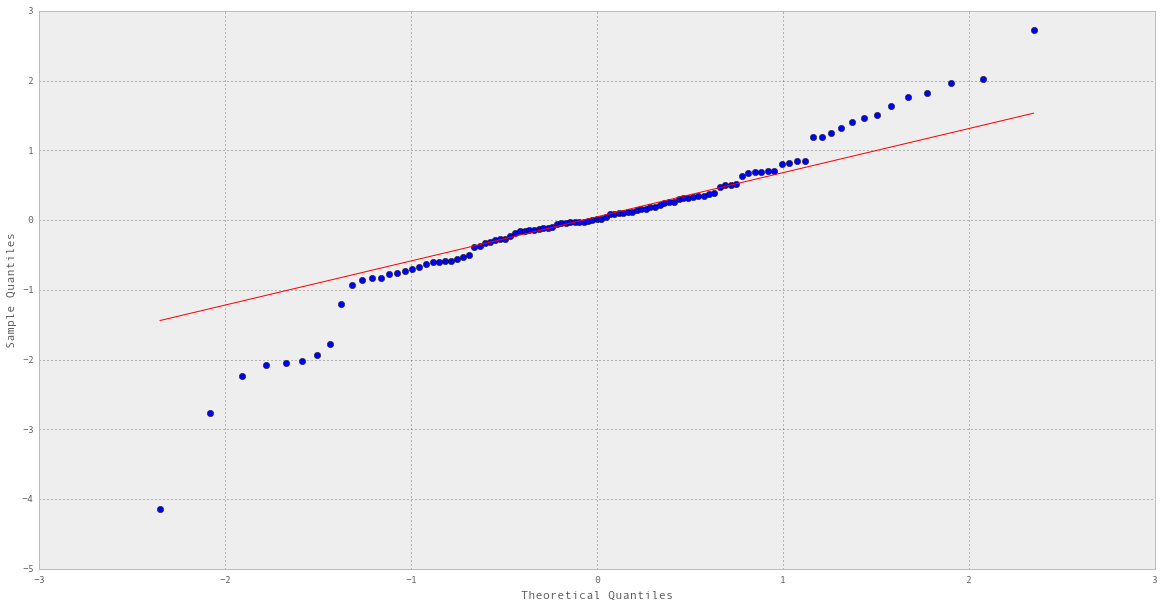

In [65]:
resid2 = arma_22.resid
print stats.normaltest(resid2)
fig = qqplot(resid2, line = 'q', fit = True)

                              ARMA Model Results                              
Dep. Variable:                   infl   No. Observations:                  105
Model:                     ARMA(1, 1)   Log Likelihood                -225.210
Method:                       css-mle   S.D. of innovations              2.056
Date:                Wed, 11 Feb 2015   AIC                            458.420
Time:                        20:54:30   BIC                            469.036
Sample:                    03-31-1975   HQIC                           462.722
                         - 03-31-2001                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.5828      1.326      3.456      0.001         1.984     7.182
ar.L1.infl     0.9411      0.035     26.844      0.000         0.872     1.010
ma.L1.infl    -0.5595      0.081     -6.916      0.0

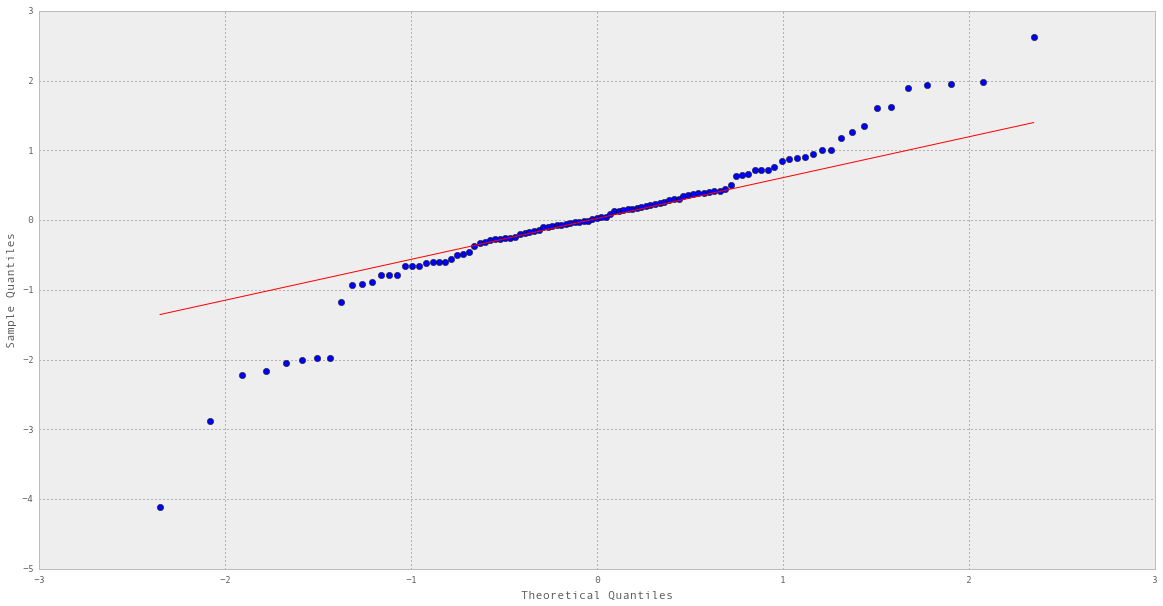

In [67]:
arma_11 = sm.tsa.ARMA(cpi_cut, (1, 1)).fit()
print(arma_11.summary())
print "Durbin Watson score: ", sm.stats.durbin_watson(arma_22.resid)

resid3 = arma_11.resid
print stats.normaltest(resid3)
fig = qqplot(resid3, line = 'q', fit = True)

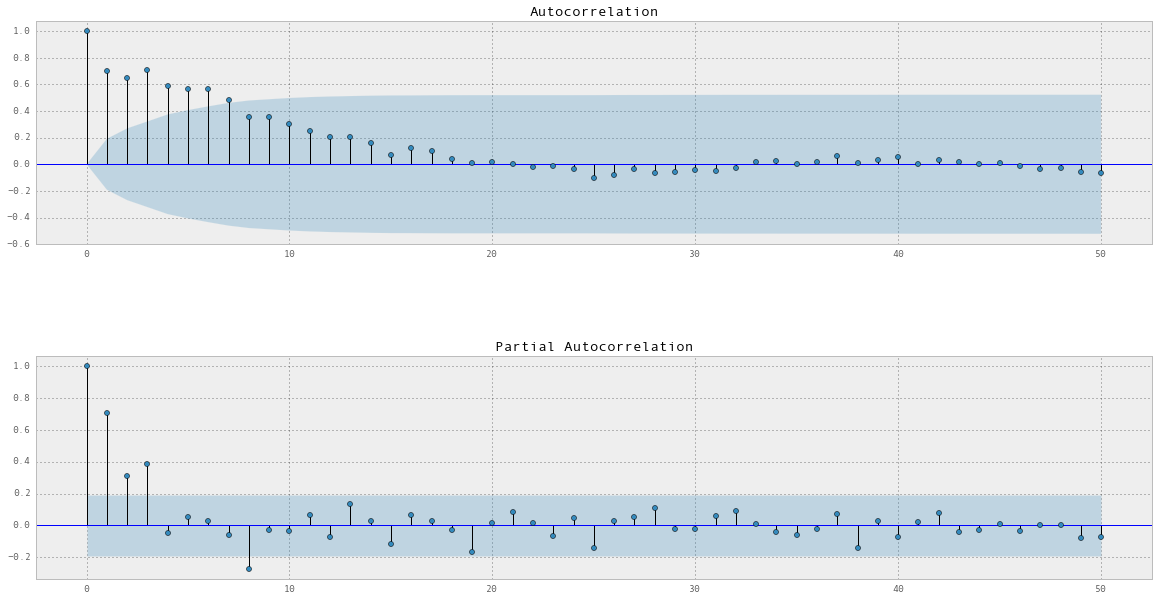

In [74]:
# Calculate Autocorrelation, Partial Auto Correlation and the Correlogram  
lag_set = 50

fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(cpi_cut, lags = lag_set, ax = ax1)   
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(cpi_cut, lags = lag_set, ax = ax2)